## 全人群

C:\Users\hp\AppData\Local\Temp\ipykernel_11468\2177938478.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_viz.rename(columns={


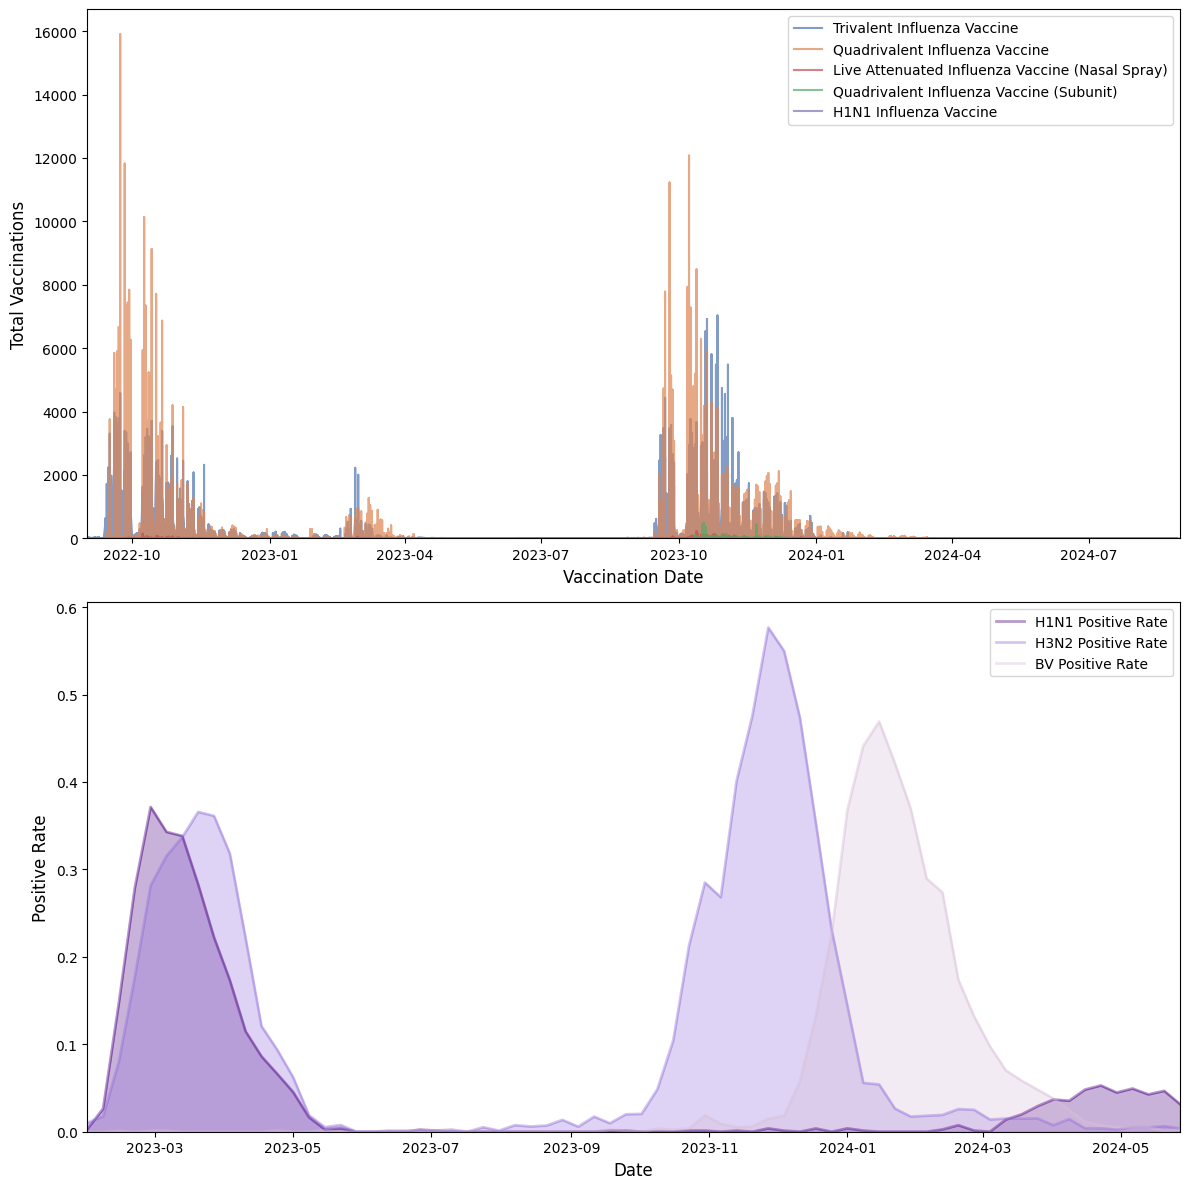

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path_vaccine = '疫苗接种数据.xlsx'


data_vaccine = pd.read_excel(file_path_vaccine)


flu_data = data_vaccine[data_vaccine['virus'] == 'flu']
flu_data = flu_data[flu_data['age_group'].notna()]  


flu_data['VACCINATION_DATE'] = pd.to_datetime(flu_data['VACCINATION_DATE'])


flu_data = flu_data[flu_data['VACCINATION_DATE'] >= '2022-09-01']


flu_data['age_group'] = flu_data['age_group'].replace({'(59,79]': '[60,inf]', '(79, Inf]': '[60,inf]'})


all_population = flu_data.copy()
all_population['age_group'] = 'All Population'
flu_data = pd.concat([flu_data, all_population])


group_name_mapping = {
    1: 'Trivalent Influenza Vaccine',
    2: 'Quadrivalent Influenza Vaccine',
    3: 'Quadrivalent Influenza Vaccine (Subunit)',
    4: 'Live Attenuated Influenza Vaccine (Nasal Spray)',
    5: 'H1N1 Influenza Vaccine'
}
flu_data['group'] = flu_data['group'].replace(group_name_mapping)


color_mapping = {
    'Trivalent Influenza Vaccine': '#4c72b0',  
    'Quadrivalent Influenza Vaccine': '#dd8452',  
    'Quadrivalent Influenza Vaccine (Subunit)': '#55a868', 
    'Live Attenuated Influenza Vaccine (Nasal Spray)': '#c44e52', 
    'H1N1 Influenza Vaccine': '#8172b2' 
}


flu_data_all_population = flu_data[flu_data['age_group'] == 'All Population']


file_path_influenza = '分亚型流感阳性率xlsx.xlsx'  
data_influenza = pd.ExcelFile(file_path_influenza)


sheet2_data = data_influenza.parse('Sheet2')
sheet2_data['起始日期'] = pd.to_datetime(sheet2_data['起始日期'])  


data_for_viz = sheet2_data[['起始日期', '甲型H1N1阳性率', '甲型 H3N2阳性率', '乙型BV阳性率']]
data_for_viz.rename(columns={
    '甲型H1N1阳性率': 'H1N1 Positive Rate',
    '甲型 H3N2阳性率': 'H3N2 Positive Rate',
    '乙型BV阳性率': 'BV Positive Rate'
}, inplace=True)


data_for_viz.set_index('起始日期', inplace=True)


colors = ['#4B0082', '#9370DB', '#D8BFD8'] 
alpha = 0.3 


fig, axs = plt.subplots(2, 1, figsize=(12, 12))  


for group in flu_data_all_population['group'].unique():
    group_subset = flu_data_all_population[flu_data_all_population['group'] == group]
    group_subset = group_subset.sort_values('VACCINATION_DATE') 
    axs[0].plot(group_subset['VACCINATION_DATE'], group_subset['total'], 
                label=f'{group}', color=color_mapping[group], alpha=0.7) 

axs[0].set_xlabel('Vaccination Date', fontsize=12)
axs[0].set_ylabel('Total Vaccinations', fontsize=12)
axs[0].legend(loc='upper right', fontsize=10, ncol=1)
axs[0].set_ylim(bottom=0)  
axs[0].margins(x=0, y=0) 


for idx, column in enumerate(data_for_viz.columns):
    axs[1].plot(data_for_viz.index, data_for_viz[column], label=column, color=colors[idx], linewidth=2 ,alpha=0.4)
    axs[1].fill_between(data_for_viz.index, 0, data_for_viz[column], color=colors[idx], alpha=alpha)

axs[1].set_xlabel('Date', fontsize=12)
axs[1].set_ylabel('Positive Rate', fontsize=12)
axs[1].legend(loc='upper right', fontsize=10, ncol=1)
axs[1].set_ylim(bottom=0) 
axs[1].margins(x=0, y=0) 


plt.tight_layout()

plt.savefig('vaccination_and_influenza_trends.pdf', dpi=450, format='pdf')

plt.show()


Sorted Age Groups: Index(['(-Inf,5]', '(5,12]', '(12,18]', '(18,59]', '[60,inf]'], dtype='object')


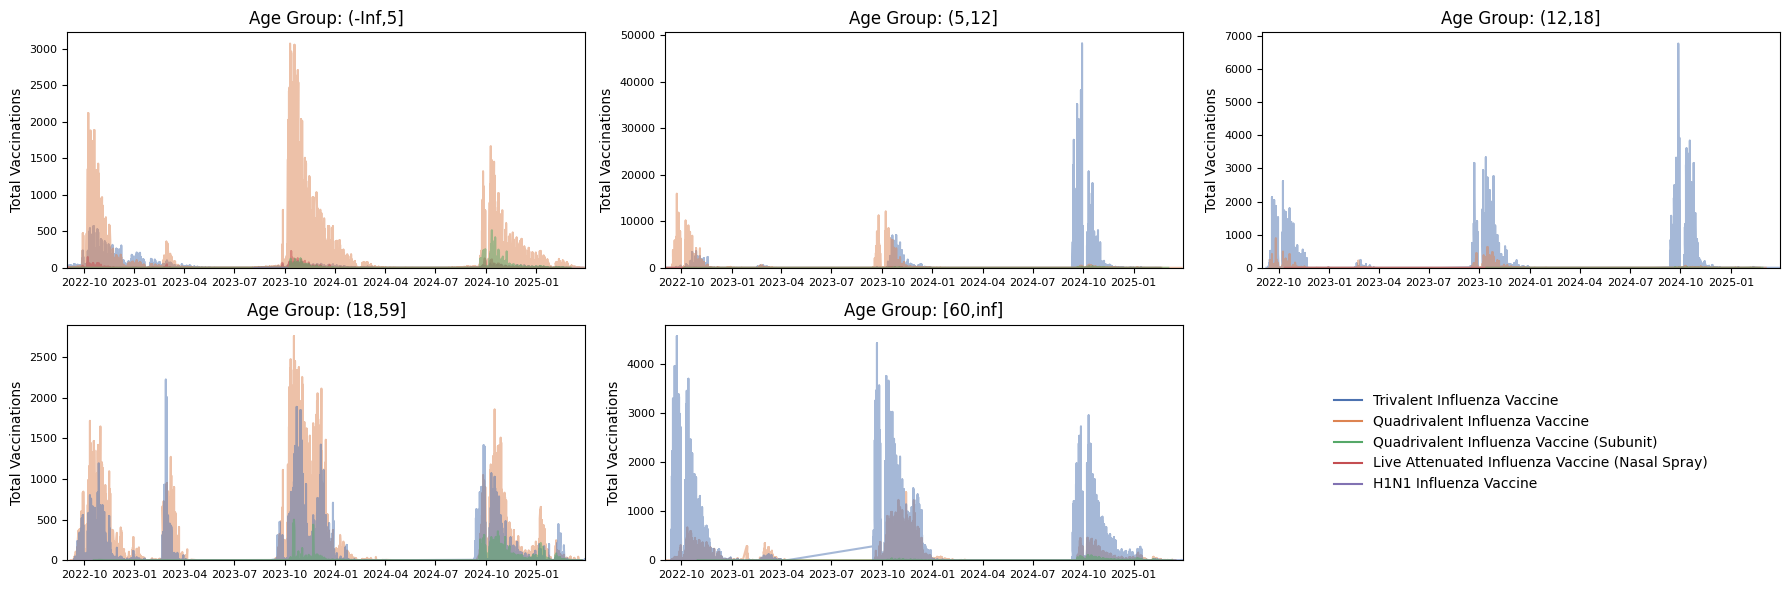

'test.pdf'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import math


file_path = './data/newdata/疫苗接种数据_疫苗2.xlsx'


data = pd.read_excel(file_path)


flu_data = data[data['virus'] == 'flu']
flu_data = flu_data[flu_data['age_group'].notna()]  


flu_data['VACCINATION_DATE'] = pd.to_datetime(flu_data['VACCINATION_DATE'])


flu_data = flu_data[flu_data['VACCINATION_DATE'] >= '2022-09-01']


flu_data['age_group'] = flu_data['age_group'].replace({'(59,79]': '[60,inf]', '(79, Inf]': '[60,inf]'})


group_name_mapping = {
    1: 'Trivalent Influenza Vaccine',
    2: 'Quadrivalent Influenza Vaccine',
    3: 'Quadrivalent Influenza Vaccine (Subunit)',
    4: 'Live Attenuated Influenza Vaccine (Nasal Spray)',
    5: 'H1N1 Influenza Vaccine'
}
flu_data['group'] = flu_data['group'].replace(group_name_mapping)


color_mapping = {
    'Trivalent Influenza Vaccine': '#4c72b0', 
    'Quadrivalent Influenza Vaccine': '#dd8452', 
    'Quadrivalent Influenza Vaccine (Subunit)': '#55a868', 
    'Live Attenuated Influenza Vaccine (Nasal Spray)': '#c44e52',  
    'H1N1 Influenza Vaccine': '#8172b2'  
}


age_group_order = ['(-Inf,5]', '(5,12]', '(12,18]', '(18,59]', '[60,inf]']  
flu_data['age_group'] = pd.Categorical(flu_data['age_group'], categories=age_group_order, ordered=True)
sorted_age_groups = flu_data['age_group'].cat.categories  


print("Sorted Age Groups:", sorted_age_groups)


n_age_groups = len(sorted_age_groups)
n_cols = 3  
n_rows = math.ceil(n_age_groups / n_cols)  


fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 3 * n_rows))
axes = axes.flatten()  

for i, age_group in enumerate(sorted_age_groups):

    group_data = flu_data[flu_data['age_group'] == age_group]
    

    for group in group_data['group'].unique():
        group_subset = group_data[group_data['group'] == group]
        group_subset = group_subset.sort_values('VACCINATION_DATE') 
        axes[i].plot(group_subset['VACCINATION_DATE'], group_subset['total'], 
                     label=f'{group}', color=color_mapping[group], alpha=0.5, linewidth=1.5, markersize=3)
    

    axes[i].set_title(f'Age Group: {age_group}', fontsize=12)
    axes[i].set_ylabel('Total Vaccinations', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)


    axes[i].set_xlim(pd.Timestamp('2022-09-01'), flu_data['VACCINATION_DATE'].max())


    axes[i].set_ylim(bottom=0)  
    axes[i].margins(x=0) 


if len(axes) > n_age_groups:
    legend_ax = axes[n_age_groups]  
    for j in range(n_age_groups, len(axes)):
        if j != n_age_groups:
            fig.delaxes(axes[j])  
else:
    legend_ax = fig.add_subplot(n_rows, n_cols, len(axes) + 1)  


legend_ax.axis('off')  
handles = [plt.Line2D([], [], color=color_mapping[group], label=group, alpha=1) for group in color_mapping]
legend_ax.legend(handles=handles, loc='center', fontsize=10, ncol=1, frameon=False)


plt.tight_layout()


output_pdf_path = 'test.pdf'
fig.savefig(output_pdf_path, dpi=450, bbox_inches='tight', format='pdf')


plt.show()


output_pdf_path


Sorted Age Groups: Index(['(-Inf,5]', '(5,12]', '(12,18]', '(18,59]', '[60,inf]'], dtype='object')


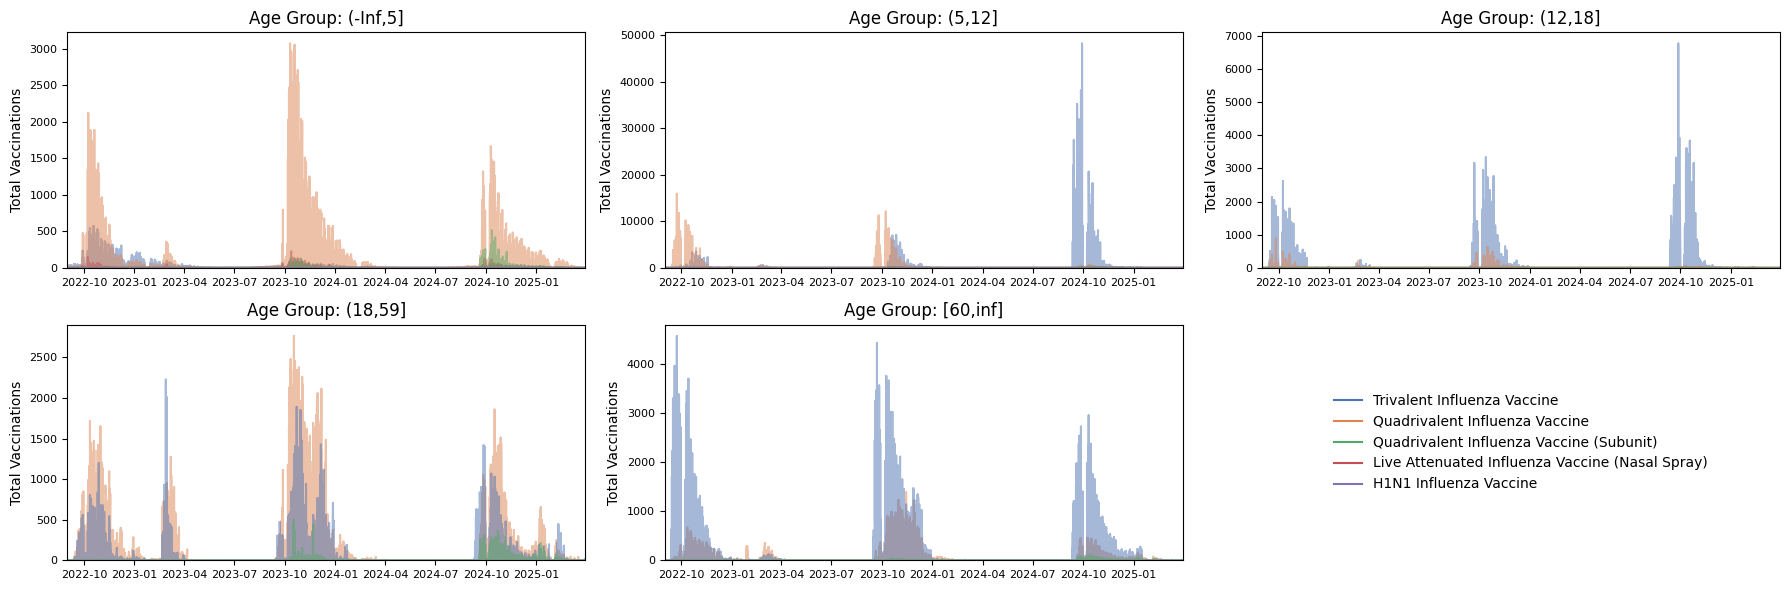

'test.pdf'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math


file_path = './data/newdata/疫苗接种数据_疫苗2.xlsx'


data = pd.read_excel(file_path)


flu_data = data[data['virus'] == 'flu']
flu_data = flu_data[flu_data['age_group'].notna()]  


flu_data['VACCINATION_DATE'] = pd.to_datetime(flu_data['VACCINATION_DATE'])


flu_data = flu_data[flu_data['VACCINATION_DATE'] >= '2022-09-01']


flu_data['age_group'] = flu_data['age_group'].replace({'(59,79]': '[60,inf]', '(79, Inf]': '[60,inf]'})


group_name_mapping = {
    1: 'Trivalent Influenza Vaccine',
    2: 'Quadrivalent Influenza Vaccine',
    3: 'Quadrivalent Influenza Vaccine (Subunit)',
    4: 'Live Attenuated Influenza Vaccine (Nasal Spray)',
    5: 'H1N1 Influenza Vaccine'
}
flu_data['group'] = flu_data['group'].replace(group_name_mapping)


color_mapping = {
    'Trivalent Influenza Vaccine': '#4c72b0', 
    'Quadrivalent Influenza Vaccine': '#dd8452', 
    'Quadrivalent Influenza Vaccine (Subunit)': '#55a868', 
    'Live Attenuated Influenza Vaccine (Nasal Spray)': '#c44e52',  
    'H1N1 Influenza Vaccine': '#8172b2'  
}


age_group_order = ['(-Inf,5]', '(5,12]', '(12,18]', '(18,59]', '[60,inf]']  
flu_data['age_group'] = pd.Categorical(flu_data['age_group'], categories=age_group_order, ordered=True)
sorted_age_groups = flu_data['age_group'].cat.categories  


print("Sorted Age Groups:", sorted_age_groups)


n_age_groups = len(sorted_age_groups)
n_cols = 3  
n_rows = math.ceil(n_age_groups / n_cols)  


fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 3 * n_rows))
axes = axes.flatten()  

# 设置日期范围（从2022-09-01到数据中的最大日期）
date_range = pd.date_range(start=pd.Timestamp('2022-09-01'),
                          end=flu_data['VACCINATION_DATE'].max(),
                          freq='D')

for i, age_group in enumerate(sorted_age_groups):
    group_data = flu_data[flu_data['age_group'] == age_group]
    
    for group in group_data['group'].unique():
        group_subset = group_data[group_data['group'] == group]
        
        # 创建一个包含完整日期范围的DataFrame
        complete_dates = pd.DataFrame({'VACCINATION_DATE': date_range})
        
        # 与实际数据合并
        merged_data = pd.merge(complete_dates,
                              group_subset[['VACCINATION_DATE', 'total']],
                              on='VACCINATION_DATE',
                              how='left')
        
        # 用0填充缺失值
        merged_data['total'] = merged_data['total'].fillna(0)
        
        # 按日期排序
        merged_data = merged_data.sort_values('VACCINATION_DATE')
        
        # 使用完整的数据集进行绘图
        axes[i].plot(merged_data['VACCINATION_DATE'], merged_data['total'], 
                    color=color_mapping[group], alpha=0.5, linewidth=1.5, markersize=3)
    
    axes[i].set_title(f'Age Group: {age_group}', fontsize=12)
    axes[i].set_ylabel('Total Vaccinations', fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

    # 设置x轴范围
    axes[i].set_xlim(pd.Timestamp('2022-09-01'), flu_data['VACCINATION_DATE'].max())

    # 设置y轴从0开始
    axes[i].set_ylim(bottom=0)  
    axes[i].margins(x=0) 


if len(axes) > n_age_groups:
    legend_ax = axes[n_age_groups]  
    for j in range(n_age_groups, len(axes)):
        if j != n_age_groups:
            fig.delaxes(axes[j])  
else:
    legend_ax = fig.add_subplot(n_rows, n_cols, len(axes) + 1)  


legend_ax.axis('off')  
handles = [plt.Line2D([], [], color=color_mapping[group], label=group, alpha=1) for group in color_mapping]
legend_ax.legend(handles=handles, loc='center', fontsize=10, ncol=1, frameon=False)


plt.tight_layout()


output_pdf_path = 'test.pdf'
plt.savefig('分年龄组疫苗.pdf', dpi=450, bbox_inches='tight')


plt.show()


output_pdf_path